# Assignment 5: Visualization and kNN
### Joe Leonard (ymd3tv) - DS 3001

### 1. Visualization (Q1)

**Q1. This question provides some practice doing exploratory data analysis and visualization.**

The "relevant" variables for this question are:

- level - Level of institution (4-year, 2-year)
- aid_value - The average amount of student aid going to undergraduate recipients
- control - Public, Private not-for-profit, Private for-profit
- grad_100_value - percentage of first-time, full-time, degree-seeking undergraduates who complete a degree or certificate program within 100 percent of expected time (bachelor's-seeking group at 4-year institutions)
1. Load the ./data/college_completion.csv data with Pandas.

In [1]:
import pandas as pd

# Loading in the Data
college_data = pd.read_csv('./data/college_completion.csv')

2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use .head() to examine the first few rows of data.

In [4]:
# Finding the Dimensions, # of Observations, and Variables
print(college_data.info())

# Examining with .head()
print(college_data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3798 entries, 0 to 3797
Data columns (total 63 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   index                                 3798 non-null   int64  
 1   unitid                                3798 non-null   int64  
 2   chronname                             3798 non-null   object 
 3   city                                  3798 non-null   object 
 4   state                                 3798 non-null   object 
 5   level                                 3798 non-null   object 
 6   control                               3798 non-null   object 
 7   basic                                 3798 non-null   object 
 8   hbcu                                  94 non-null     object 
 9   flagship                              50 non-null     object 
 10  long_x                                3798 non-null   float64
 11  lat_y            

3. Cross tabulate control and level. Describe the patterns you see.

In [5]:
# Cross-Tabulate 'control' and 'level'
cross_tab = pd.crosstab(college_data['control'], college_data['level'])
print(cross_tab)

level                   2-year  4-year
control                               
Private for-profit         465     527
Private not-for-profit      68    1180
Public                     926     632


From this Cross-Tab, we can see that 2-year colleges are primarily public and 4-year colleges are primarily private (specifically not-for-profit).

4. For grad_100_value, create a histogram, kernel density plot, boxplot, and statistical description.

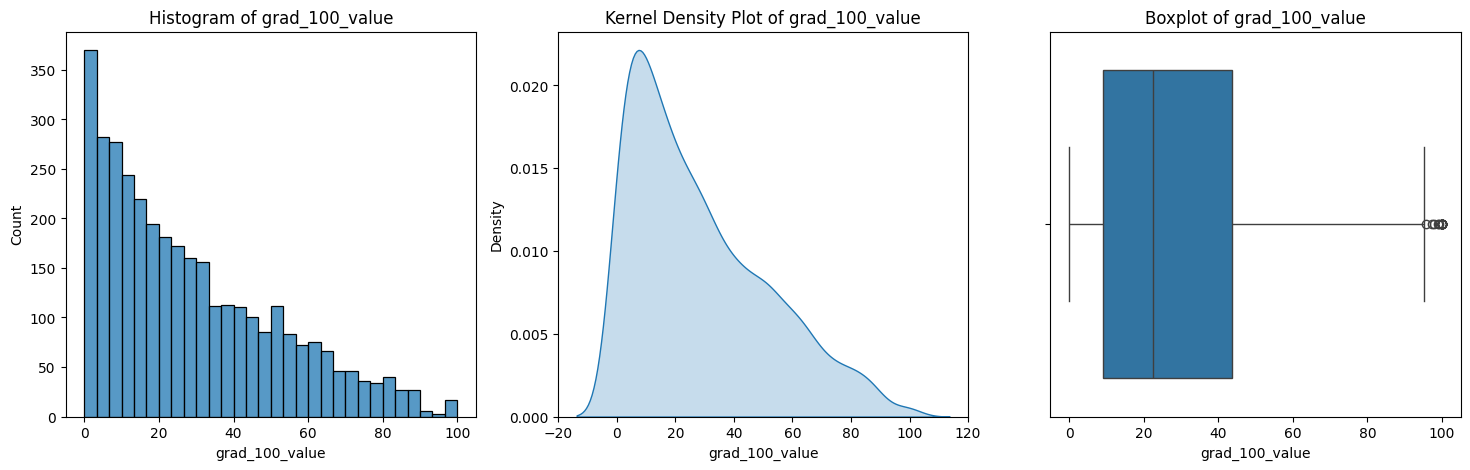

count    3467.000000
mean       28.364465
std        23.312730
min         0.000000
25%         9.000000
50%        22.500000
75%        43.650000
max       100.000000
Name: grad_100_value, dtype: float64


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Histogram
sns.histplot(college_data['grad_100_value'].dropna(), bins=30, kde=False, ax=axes[0])
axes[0].set_title('Histogram of grad_100_value')

# Kernel Density Plot
sns.kdeplot(college_data['grad_100_value'].dropna(), fill=True, ax=axes[1])
axes[1].set_title('Kernel Density Plot of grad_100_value')

# Boxplot
sns.boxplot(x=college_data['grad_100_value'], ax=axes[2])
axes[2].set_title('Boxplot of grad_100_value')

plt.show()

# Statistical Description
print(college_data['grad_100_value'].describe())

5. For grad_100_value, create a grouped kernel density plot by control and by level. Describe what you see. Use groupby and .describe to make grouped calculations of statistical descriptions of grad_100_value by level and control. Which institutions appear to have the best graduation rates?

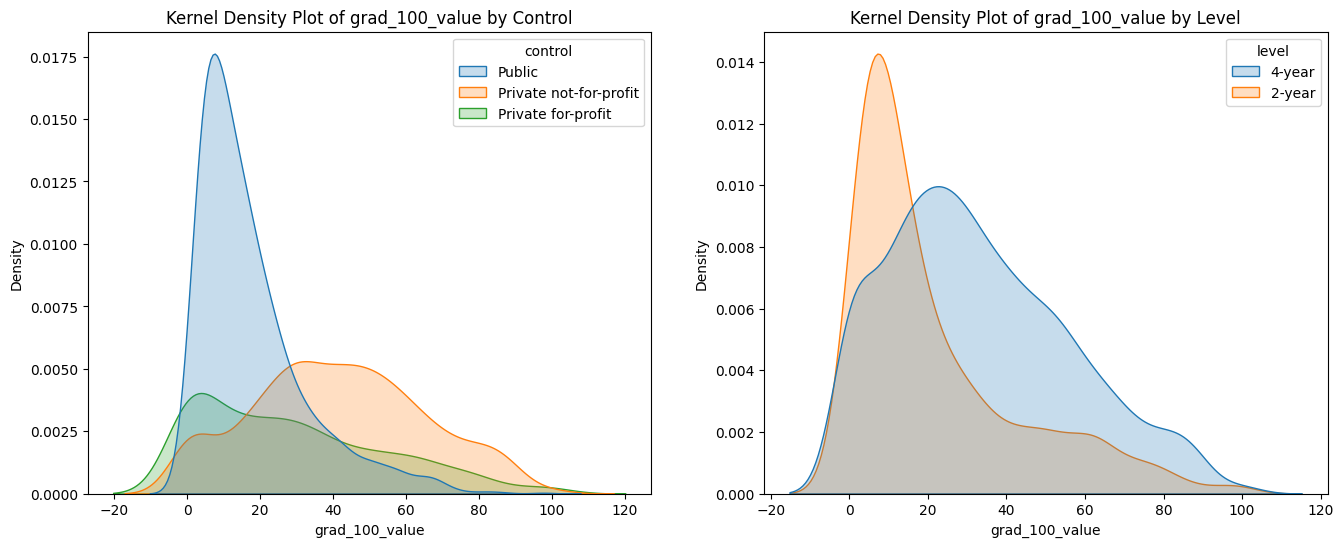

In [ ]:
# Create Subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# KDE by 'control'
sns.kdeplot(data=college_data, x='grad_100_value', hue='control', fill=True, ax=axes[0])
axes[0].set_title('Kernel Density Plot of grad_100_value by Control')

# KDE by 'level'
sns.kdeplot(data=college_data, x='grad_100_value', hue='level', fill=True, ax=axes[1])
axes[1].set_title('Kernel Density Plot of grad_100_value by Level')

plt.show()

In [8]:
control_stats = college_data.groupby('control')['grad_100_value'].describe()
print("Summary Statistics by Control:\n", control_stats)

level_stats = college_data.groupby('level')['grad_100_value'].describe()
print("\nSummary Statistics by Level:\n", level_stats)

grouped_stats = college_data.groupby(['control', 'level'])['grad_100_value'].describe()
print("\nSummary Statistics by Control and Level:\n", grouped_stats)

Summary Statistics by Control:
                          count       mean        std  min    25%   50%    75%  \
control                                                                         
Private for-profit       779.0  29.108858  25.601687  0.0   6.95  24.7  46.75   
Private not-for-profit  1189.0  41.660976  23.551231  0.0  25.00  41.0  58.30   
Public                  1499.0  17.430887  14.729443  0.0   6.90  13.2  23.25   

                          max  
control                        
Private for-profit      100.0  
Private not-for-profit  100.0  
Public                   97.8  

Summary Statistics by Level:
          count       mean        std  min   25%   50%     75%    max
level                                                               
2-year  1455.0  21.636151  21.645747  0.0   6.0  13.0  30.600  100.0
4-year  2012.0  33.230119  23.270160  0.0  15.2  29.7  49.225  100.0

Summary Statistics by Control and Level:
                                 count       mean    

Private not-for-profit institutions, particularly 4-year colleges, have the highest graduation rates, with a median of 41% and a maximum of 100%. In contrast, public and private for-profit institutions tend to have lower graduation rates, especially among 2-year programs, where public institutions have a median of only 9.4%.

6. Create a new variable, df['levelXcontrol']=df['level']+', '+df['control'] that interacts level and control. Make a grouped kernel density plot. Which institutions appear to have the best graduation rates?

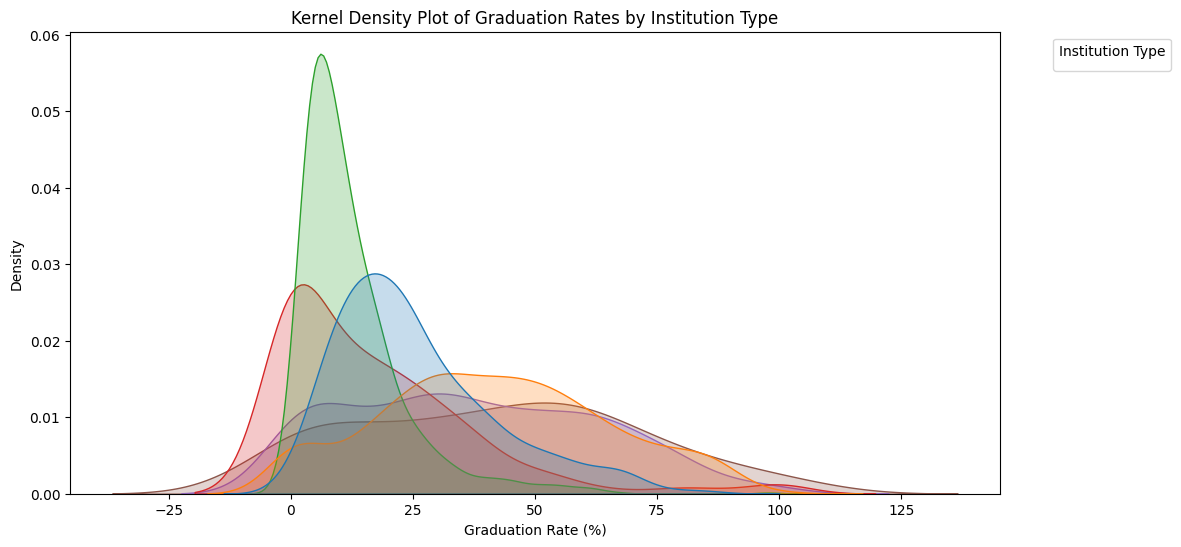

In [ ]:
college_data['levelXcontrol'] = college_data['level'] + ', ' + college_data['control']

plt.figure(figsize=(12, 6))
sns.kdeplot(data=college_data, x='grad_100_value', hue='levelXcontrol', fill=True, common_norm=False)
plt.title('Kernel Density Plot of Graduation Rates by Institution Type')
plt.xlabel('Graduation Rate (%)')
plt.ylabel('Density')
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles, labels, title='Institution Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Although the legend is not working for some reason, we can assume that private non-profit 4-year institutions will give us the highest graduation rates.

7. Make a kernel density plot of aid_value. Now group your graph by level and control. What explains the shape of the graph? Use groupby and .describe to make grouped calculations of statistical descriptions of aid_value by level and control.

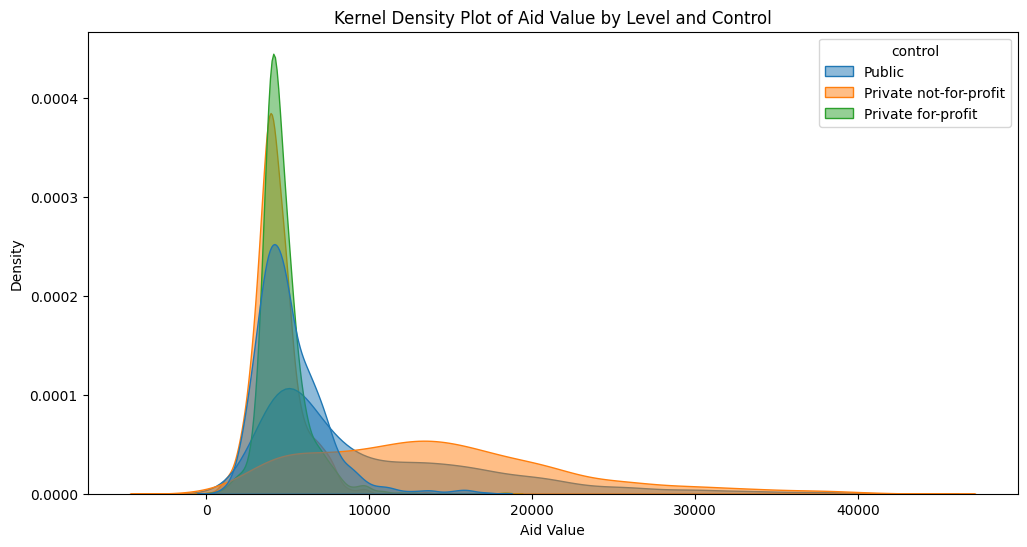

In [15]:
# KDE Grouped by 'level' and 'control'
plt.figure(figsize=(12, 6))
sns.kdeplot(data=college_data, x='aid_value', hue='level', fill=True, common_norm=False, alpha=0.5)
sns.kdeplot(data=college_data, x='aid_value', hue='control', fill=True, common_norm=False, alpha=0.5)
plt.title('Kernel Density Plot of Aid Value by Level and Control')
plt.xlabel('Aid Value')
plt.ylabel('Density')
plt.show()

In [16]:
# Statistical Description
grouped_aid_value = college_data.groupby(['level', 'control'])['aid_value'].describe()
print(grouped_aid_value)

                                count          mean          std     min  \
level  control                                                             
2-year Private for-profit       464.0   4559.681034  1286.688269   294.0   
       Private not-for-profit    68.0   5128.058824  2590.449946   934.0   
       Public                   926.0   4126.199784  1260.271382   881.0   
4-year Private for-profit       527.0   4696.062619  1489.410020  1580.0   
       Private not-for-profit  1180.0  14702.401695  7649.775203   902.0   
       Public                   632.0   6514.071203  2353.716693  2232.0   

                                   25%      50%       75%      max  
level  control                                                      
2-year Private for-profit      3818.75   4286.5   5122.00   9727.0  
       Private not-for-profit  3650.00   4516.5   6311.50  13654.0  
       Public                  3311.25   3943.5   4762.00   9809.0  
4-year Private for-profit      3885.50   4364.

The statistical summary of aid_value shows that private non-profit institutions (especially at the 4-year level) tend to offer the highest average financial aid, with a mean value of over $14,700, while public institutions offer more moderate aid values, averaging around $6,500 for 4-year institutions. Private for-profit institutions show a more consistent range of aid, with means around $4,600 for both 2-year and 4-year levels, indicating lower and less variable aid packages compared to the other two control types.

8. Make a scatterplot of grad_100_value by aid_value. Describe what you see. Now make the same plot, grouping by level and then control. Describe what you see. For which kinds of institutions does aid seem to increase graduation rates?

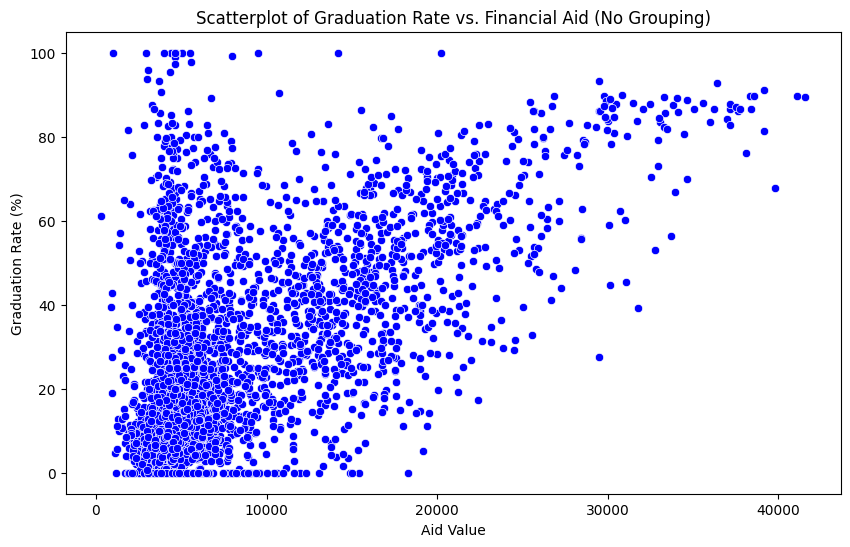

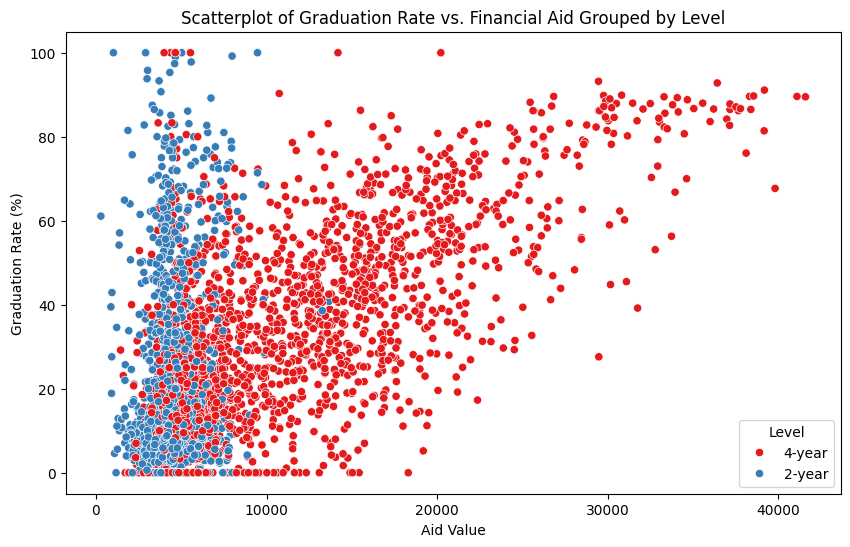

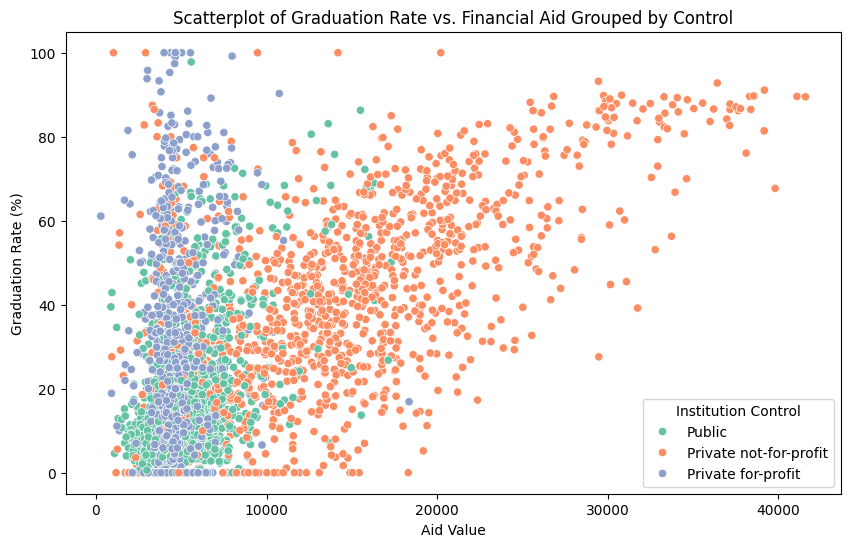

In [ ]:
# Scatterplot of 'grad_100_value' by 'aid_value'
plt.figure(figsize=(10, 6))
sns.scatterplot(data=college_data, x='aid_value', y='grad_100_value', color='blue')
plt.title('Scatterplot of Graduation Rate vs. Financial Aid (No Grouping)')
plt.xlabel('Aid Value')
plt.ylabel('Graduation Rate (%)')
plt.show()

# Scatterplot Grouped by 'level'
plt.figure(figsize=(10, 6))
sns.scatterplot(data=college_data, x='aid_value', y='grad_100_value', hue='level', palette='Set1')
plt.title('Scatterplot of Graduation Rate vs. Financial Aid Grouped by Level')
plt.xlabel('Aid Value')
plt.ylabel('Graduation Rate (%)')
plt.legend(title='Level')
plt.show()

# Scatterplot Grouped by 'control'
plt.figure(figsize=(10, 6))
sns.scatterplot(data=college_data, x='aid_value', y='grad_100_value', hue='control', palette='Set2')
plt.title('Scatterplot of Graduation Rate vs. Financial Aid Grouped by Control')
plt.xlabel('Aid Value')
plt.ylabel('Graduation Rate (%)')
plt.legend(title='Institution Control')
plt.show()

We can see that private schools are more likely to give financial aid. We can also see in the ungrouped graph that there could potentially be a correlation between aid given and graduation, as these are likely students encouraged to finish school to improve their lifestyle.

### 2. kNN (Q0 & Q1)

**Q0.**
1. What is the difference between regression and classification?
- The key distinction is that regression outcomes are numerical, while classification outcomes are categorical.
2. What is a confusion table? What does it help us understand about a model's performance?
- A confusion table is a tool used to evaluate the performance of classification models by showing the counts of true positives, false positives, true negatives, and false negatives. It helps to understand where the model is making errors and provides insight into how well it distinguishes between different classes.
3. What does the SSE quantify about a particular model?
- The SSE quantifies the total squared differences between predicted values and actual values in a regression model, indicating how well the model fits the data. A lower SSE value suggests a better fit, as it means the model’s predictions are closer to the actual values.
4. What are overfitting and underfitting? 
- Overfitting occurs when a model is too complex, capturing noise in the training data and performing poorly on unseen data, while underfitting happens when a model is too simple and fails to capture important patterns, resulting in poor performance on both the training and test data.
5. Why does splitting the data into training and testing sets, and choosing $k$ by evaluating accuracy or SSE on the test set, improve model performance?
- Splitting data into training and testing sets ensures that the model is evaluated on data it has not seen before, preventing overfitting and helping to assess its generalization ability. Choosing $k$ based on test set performance ensures the model is neither too complex nor too simple, optimizing accuracy and minimizing error.
6. With classification, we can report a class label as a prediction or a probability distribution over class labels. Please explain the strengths and weaknesses of each approach.
- Reporting a class label as a prediction gives a straightforward and definitive answer, but it can be less informative about the model's uncertainty in its decision. In contrast, reporting a probability distribution provides richer information by indicating the model's confidence levels, though it may be more complex to interpret and apply directly in decision-making.

**Q1. This question is a case study for $k$ nearest neighbor regression, using the `USA_cars_datasets.csv` data.**

The target variable `y` is `price` and the features are `year` and `mileage`.

1. Load the `./data/USA_cars_datasets.csv`. Keep the following variables and drop the rest: `price`, `year`, `mileage`. Are there any `NA`'s to handle? Look at the head and dimensions of the data.

In [18]:
# Loading in the Data
car_data = pd.read_csv('./data/USA_cars_datasets.csv')

car_data = car_data[['price', 'year', 'mileage']]
na_values = car_data.isna().sum()

head_data = car_data.head()
data_dimensions = car_data.shape
na_values, head_data, data_dimensions

(price      0
 year       0
 mileage    0
 dtype: int64,
    price  year  mileage
 0   6300  2008   274117
 1   2899  2011   190552
 2   5350  2018    39590
 3  25000  2014    64146
 4  27700  2018     6654,
 (2499, 3))

2. Maxmin normalize `year` and `mileage`.

In [19]:
car_data['year_normalized'] = (car_data['year'] - car_data['year'].min()) / (car_data['year'].max() - car_data['year'].min())
car_data['mileage_normalized'] = (car_data['mileage'] - car_data['mileage'].min()) / (car_data['mileage'].max() - car_data['mileage'].min())

car_data.head()

,price,year,mileage,year_normalized,mileage_normalized
0,6300,2008,274117,0.744681,0.269287
1,2899,2011,190552,0.808511,0.187194
2,5350,2018,39590,0.957447,0.038892
3,25000,2014,64146,0.872340,0.063016
4,27700,2018,6654,0.957447,0.006537


3. Split the sample into ~80% for training and ~20% for evaluation.

In [20]:
from sklearn.model_selection import train_test_split

train_data, eval_data = train_test_split(car_data, test_size=0.2, random_state=42)

print(f"Training Data Dimensions: {train_data.shape}")
print(f"Evaluation Data Dimensions: {eval_data.shape}")

Training Data Dimensions: (1999, 5)
Evaluation Data Dimensions: (500, 5)


4. Use the $k$NN algorithm and the training data to predict `price` using `year` and `mileage` for the test set for $k=3,10,25,50,100,300$. For each value of $k$, compute the mean squared error and print a scatterplot showing the test value plotted against the predicted value. What patterns do you notice as you increase $k$?

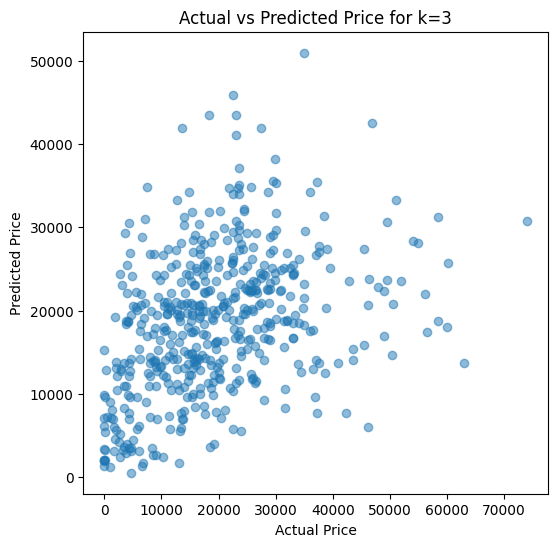

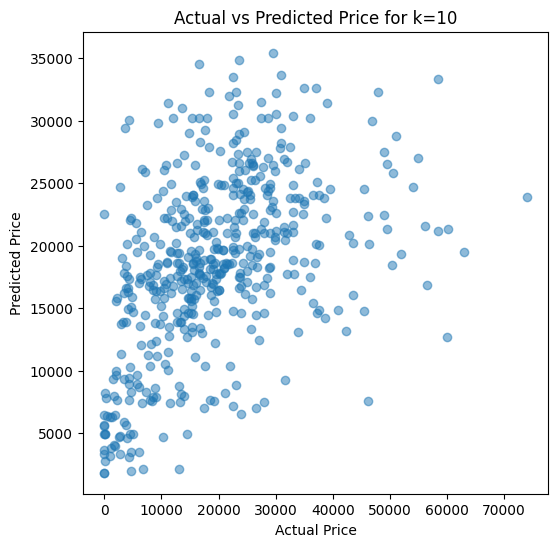

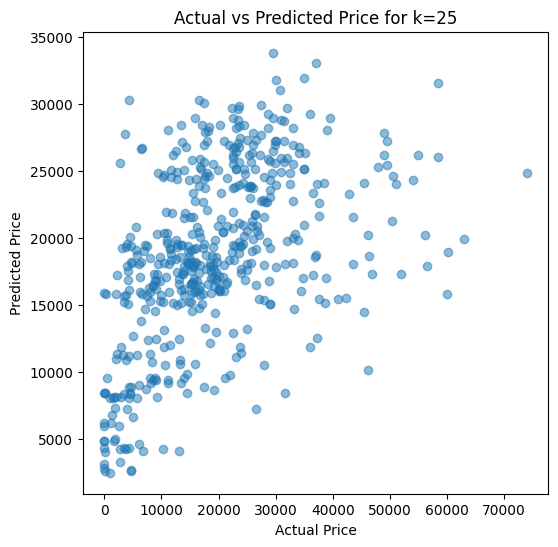

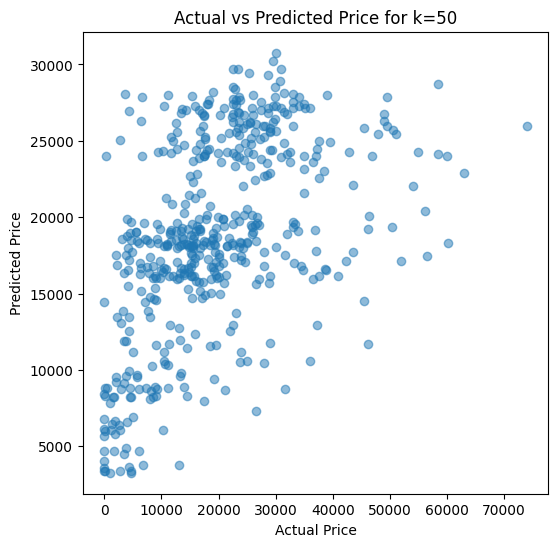

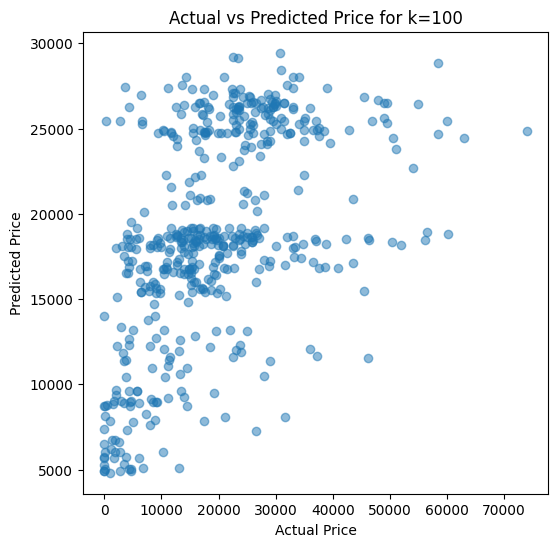

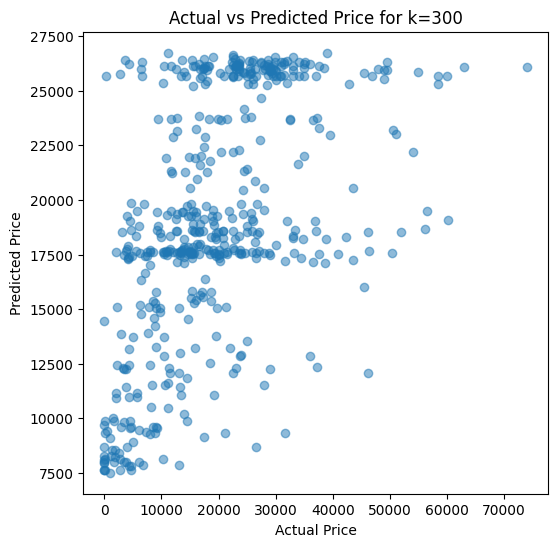

MSE for k=3: 148395853.1446667
MSE for k=10: 125511670.1131
MSE for k=25: 119966941.6809024
MSE for k=50: 117591986.78483519
MSE for k=100: 115614719.56867
MSE for k=300: 116473876.20942833


In [21]:
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor

# Values of K
k_values = [3, 10, 25, 50, 100, 300]

mse_values = []
predictions = []

for k in k_values:
    # Initialize the KNeighborsRegressor Model
    knn_model = KNeighborsRegressor(n_neighbors=k)
    
    # Fit the Model
    knn_model.fit(train_data[['year', 'mileage']], train_data['price'])
    
    # Predict the Price
    y_pred = knn_model.predict(eval_data[['year', 'mileage']])
    
    # Compute Mean Squared Error (MSE)
    mse = mean_squared_error(eval_data['price'], y_pred)
    mse_values.append(mse)
    
    # Store Predictions
    predictions.append(y_pred)

    # Scatterplot
    plt.figure(figsize=(6, 6))
    plt.scatter(eval_data['price'], y_pred, alpha=0.5)
    plt.title(f"Actual vs Predicted Price for k={k}")
    plt.xlabel('Actual Price')
    plt.ylabel('Predicted Price')
    plt.show()

# Print the MSE for Each K
for k, mse in zip(k_values, mse_values):
    print(f"MSE for k={k}: {mse}")


As $k$ increases from 3 to 100, the Mean Squared Error (MSE) decreases, suggesting the model improves by generalizing better and avoiding overfitting. However, at $k$ = 300, the MSE increases slightly, indicating that the model may start underfitting as it becomes too simplistic.

5. Determine the optimal $k$ for these data.

The optimal value of $k$ is typically determined by balancing the trade-off between overfitting and underfitting, which is usually done by choosing the value of $k$ that minimizes the Mean Squared Error (MSE) on the test set. From the results, the lowest MSE is observed for 
$k$ = 100, making it the optimal value for these data.

6. Describe what happened in the plots of predicted versus actual prices as $k$ varied, taking your answer into part 6 into account. (Hint: Use the words "underfitting" and "overfitting".)

As $k$ increased, the scatterplots of predicted versus actual prices showed a shift from underfitting to a better fit and then to overfitting. For smaller values of $k$ (such as 3), the model was highly sensitive to noise in the data, resulting in a poor fit and underfitting, with predictions scattered far from the actual prices. As $k$ increased (such as at $k$ = 25 or $k$ = 50), the model began to generalize better, resulting in predictions that were closer to the actual prices. However, when $k$ became very large (like 300), the model started to lose its ability to capture the finer details of the data, leading to overfitting, where predictions became less accurate as the model became too smooth and ignored subtle variations.